<a href="https://colab.research.google.com/github/LucasCarmonaDev/ProjetoPyhon/blob/main/FastAPI_DiegoBruno_DIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**O que é Flask?**

Flask é um micro framework web escrito em Python. É classificado como um microframework porque não requer ferramentas ou bibliotecas específicas. Não possui camada de abstração de banco de dados, validação de formulário ou qualquer outro componente em que bibliotecas de terceiros pré-existentes forneçam funções comuns. Se você é novo no desenvolvimento web em Python. Flask é um bom lugar para começar.

**O que é FastAPI?**

FastAPI é um framework web moderno e rápido (de alto desempenho) para construir APIs com Python 3.6+ baseado em dicas de tipo Python padrão.

**As principais características são:**

**Rápido :** Desempenho muito alto, a par com NodeJS e Go (graças a Starlette e Pydantic). Um dos frameworks Python mais rápidos disponíveis .

**Rápido para codificar :** Aumente a velocidade para desenvolver recursos em cerca de 200% a 300%.

**Menos bugs :** Reduza cerca de 40% dos erros induzidos por humanos (desenvolvedores).

**Intuitivo :** Ótimo suporte ao editor. Conclusão em todos os lugares. Menos tempo de depuração.

**Fácil :** Projetado para ser fácil de usar e aprender. Menos tempo lendo documentos.

**Curto :** Minimize a duplicação de código. Vários recursos de cada declaração de parâmetro. Menos erros.

**Robusto :** Obtenha código pronto para produção. Com documentação interativa automática.

**Baseado em padrões :** Baseado em (e totalmente compatível com) os padrões abertos para APIs

**O que é o Google Colab?**

O Google colaboratory, ou “Colab” para abreviar, permite que você escreva e execute Python em seu navegador, com

Configuração zero necessária
Acesso gratuito a GPUs
Compartilhamento fácil
Seja você um estudante, um cientista de dados ou um pesquisador de IA, o Colab pode facilitar seu trabalho. O Google Colab tem uma estrutura quase semelhante ao Jupyter Notebooks.

Começaremos este tutorial instalando os pacotes necessários. Para instalar pacotes no google colab use o ! (exclamação) como mostrado, caso contrário, se você estiver executando a demonstração em uma máquina local, poderá escrever os seguintes comandos pip no prompt de comando e remover o ponto de exclamação. Além disso, certifique-se de que pip é uma variável de ambiente em sua CLI (Prompt de Comando).

In [ ]:
!pip install flask
!pip install flask-ngrok

Por que instalamos o flask-ngrok?

O motivo é que o servidor flask cria um servidor que é executado localmente no tempo de execução alocado no google colab como localhost. Para expor o servidor ao tráfego externo ou tornar o servidor acessível fora do tempo de execução globalmente em HTTP, o ngrok é usado. Já que estamos trabalhando com flask é bom usar o módulo flask-ngrok do python. A figura abaixo dá uma ideia básica.

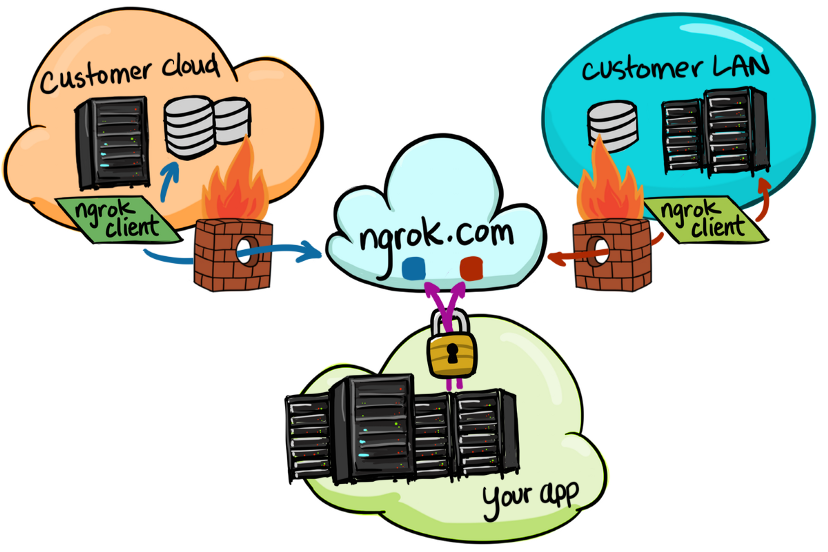

In [ ]:
from flask import *
from flask_ngrok import run_with_ngrok
app = Flask(__name__)
@app.route('/index')
def home():
  return 'Hello World'

Esta é uma rota simples que criamos. O decorador @app.route('/index') é usado para aprimorar a funcionalidade da função home() . Sempre que chamamos o servidor em http://hostname:portnumber/index, a função home() também será chamada. O nome do host é 'localhost' que mapeia para 127.0.0.1 como o endereço IP correspondente se você quiser acessar um servidor localmente em execução. Isso é apenas para referência. Não vamos nos preocupar muito com isso nesta demonstração.

In [ ]:
run_with_ngrok(app)
app.run()

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000 (Press CTRL+C to quit)


 * Running on http://3e5b-104-196-200-52.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


A função run_with_ngrok() recebe o objeto da classe Flask , aqui ele é armazenado em uma variável chamada app . Ele anexa o ngrok ao aplicativo flask para que, quando executarmos o aplicativo, uma URL possa ser gerada, acessível fora do tempo de execução.

In [ ]:
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production [31m   WARNING: This is a development      server. Do not use it in a production deployment.[0m [2m   Use a production WSGI server instead.[0m
 * Debug mode: off
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
 * Running on http://57b01f4a6baf.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040

Agora, ao executar a função app.run() , nosso servidor está configurado. Ele pode ser acessado externamente com a URL gerada, ou seja , http://57b01f4a6baf.ngrok.io , mas criamos uma rota apenas para /index , portanto, devemos verificar isso com http://57b01f4a6baf.ngrok.io/index conforme mostrado abaixo.

Usando o flask, é fácil criar APIs simples com total flexibilidade e agora podemos explorar o poder do Google Colab também e tentar criar um serviço de ML usando isso.

Vamos agora pular rapidamente para FastAPI, que é uma biblioteca muito promissora de Python devido ao fato de ser baseada em ASGI e lidar com solicitações de maneira assíncrona, aumentando a taxa de transferência e o desempenho em comparação com o Flask, que usa WSGI que não suporta chamadas assíncronas. O FastAPI também tem uma boa documentação disponível. Para executar o FastAPI no Google Colab, precisamos instalá-lo primeiro junto com os seguintes pacotes:

In [ ]:
!pip install fastapi nest-asyncio pyngrok uvicorn



Em seguida, importamos a classe FastAPI do módulo fastapi e criamos seu objeto que chamamos de app . Também criamos uma rota com o decorador @app.route('/index') que está vinculado ao método home() . async atua como um modificador para fazer a função executar de forma assíncrona. O servidor FastAPI local é executado na porta número 8000 e o ngrok cria um túnel para que redes externas também possam acessá-lo conforme descrito anteriormente na implementação do servidor flask. Como o FastAPI suporta chamadas assíncronas, precisamos de um servidor ASGI, ou seja, uvicorn, que execute o aplicativo na porta número 8000 localmente.

In [ ]:
from fastapi import FastAPI
import nest_asyncio
from pyngrok import ngrok
import uvicorn

app = FastAPI()

@app.get('/index')
async def home():
  return "Hello World"

ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)

Ao executar este trecho de código, recebemos a seguinte mensagem no console.

In [ ]:
Public URL: http://af9a6a5b8bdb.ngrok.io


INFO:     Started server process [63]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)

Nosso servidor FastAPI está funcionando e vamos digitar {Public_URL}/index no navegador para chegar ao nosso endpoint, pois criamos apenas uma rota, ou seja , /index .

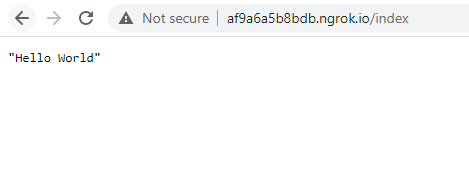

Com isso chegamos ao final deste tutorial. Você pode encontrar o código desta demonstração aqui . Espero que este blog tenha sido nítido e abrangente. Não se esqueça de curtir e me seguir se quiser receber mais atualizações do meu lado. Boa Codificação!!!